In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/frauddetection/transactions_train.csv


In [2]:
df=pd.read_csv("../input/frauddetection/transactions_train.csv")
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0


# Expoloratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [5]:
fraud_counts=df["isFraud"].value_counts()
fraud_counts

0    6343476
1       7717
Name: isFraud, dtype: int64

### Pie chart to illustrate the Proportion Of Fraudulent Transactions.

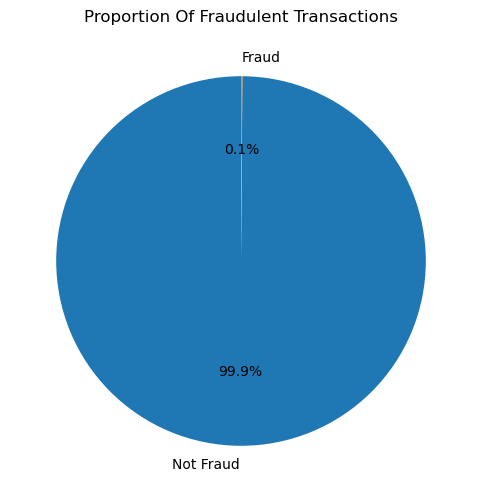

In [6]:
labels= ["Not Fraud", "Fraud"]
counts=[fraud_counts[0],fraud_counts[1]]
plt.figure(figsize=(8,6))
plt.pie(counts,labels=labels,autopct="%1.1f%%",startangle=90)
plt.title("Proportion Of Fraudulent Transactions")
plt.show()

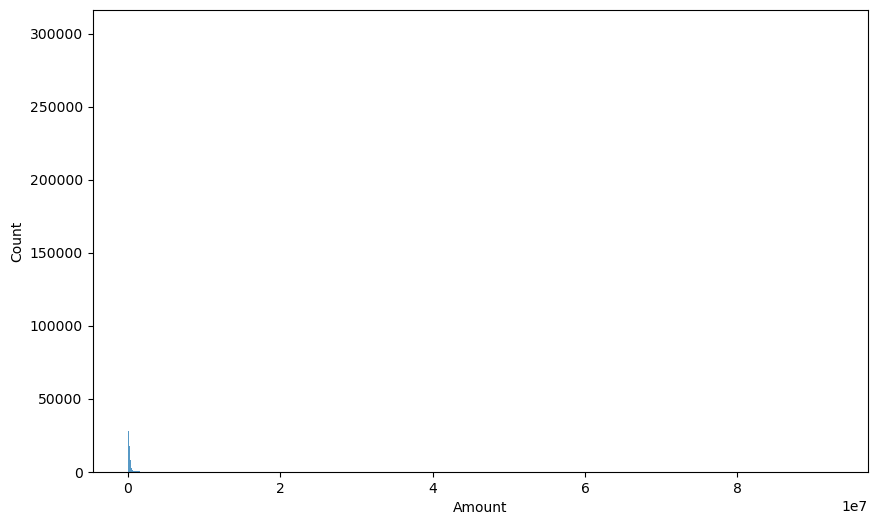

In [7]:
# Histogram - Distribution Of "amount" Column
plt.figure(figsize=(10,6))
sns.histplot(df["amount"])
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()